In [6]:
!wget https://worksheets.codalab.org/rest/bundles/0x27d8fe6289a4423596805969ac884f2d/contents/blob/output.json -O src/output.json

--2020-11-10 15:11:46--  https://worksheets.codalab.org/rest/bundles/0x27d8fe6289a4423596805969ac884f2d/contents/blob/output.json
Resolving worksheets.codalab.org (worksheets.codalab.org)... 40.114.41.203
Connecting to worksheets.codalab.org (worksheets.codalab.org)|40.114.41.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Syntax error in Set-Cookie: codalab_session=""; expires=Thu, 01 Jan 1970 00:00:00 GMT; Max-Age=-1; Path=/ at position 70.
Length: unspecified [application/json]
Saving to: ‘src/output.json’

src/output.json         [ <=>                ]  14.95K  --.-KB/s    in 0s      

2020-11-10 15:11:46 (49.2 MB/s) - ‘src/output.json’ saved [15311]



In [8]:
!npm run aggregate


> scanner@1.0.0 aggregate /Users/epicfaace/oss/scanner
> ts-node src/aggregate.ts

[
  { version: 'total', count: 11 },
  { version: 'undefined', count: 4 },
  { version: '16.13.1', count: 2 },
  { version: '16.7.0', count: 1 },
  { version: '17.0.1', count: 1 },
  { version: '16.10.2', count: 1 },
  { version: '16.14.0', count: 1 },
  { version: '15.4.0', count: 1 }
]


In [37]:
import pandas as pd
import json
import os

OUTPUT_DIR = "src/output"

os.makedirs(OUTPUT_DIR, exist_ok=True)

with open("src/stats.json") as f:
    stats = json.load(f)
    
stats

{'totalDomains': 97,
 'domainsNoneDetected': 56,
 'domainsDetected': 41,
 'packageTotals': {'jquery': 26, 'react': 11, 'core-js': 19, 'axios': 2},
 'packages': {'jquery': {'2.1.1': 2,
   '1.11.0': 6,
   '3.5.0': 1,
   '3.0.0': 2,
   '1.11.2': 7,
   '1.11.1': 1,
   '1.8.2': 1,
   '2.1.2': 5,
   '1.5.1': 1},
  'react': {'16.7.0': 1,
   '16.13.1': 2,
   'undefined': 4,
   '17.0.1': 1,
   '16.10.2': 1,
   '16.14.0': 1,
   '15.4.0': 1},
  'core-js': {'2.6.4': 5,
   '3.6.2': 7,
   '3.3.4': 1,
   '3.1.4': 1,
   '2.5.6': 2,
   '2.6.0': 1,
   '2.1.0': 1,
   '2.5.0': 1},
  'axios': {'0.15.0': 1, '0.8.0': 1}}}

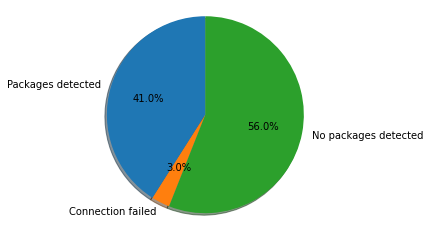

In [43]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Packages detected', 'Connection failed', 'No packages detected'
sizes = [stats["domainsDetected"], 100 - stats["domainsDetected"] - stats["domainsNoneDetected"], stats["domainsNoneDetected"]]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.savefig(f'{OUTPUT_DIR}/detection.png', dpi=300, bbox_inches='tight')
plt.show()

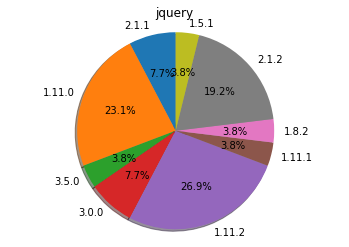

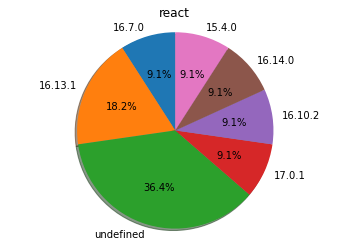

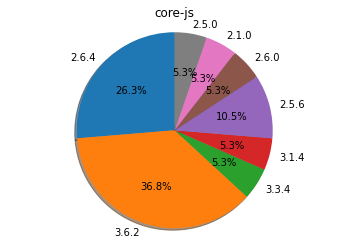

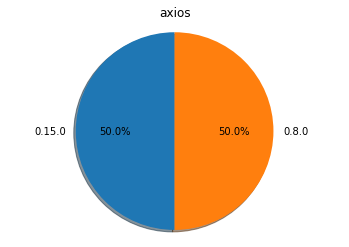

In [44]:
for i, package in enumerate(stats["packages"]):
    labels = stats["packages"][package].keys()
    sizes = stats["packages"][package].values()
    explode = [0 for i in sizes]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    plt.title(package)

    plt.savefig(f'{OUTPUT_DIR}/packages-{package}.png', dpi=300, bbox_inches='tight')
    plt.show()